## Main topics: Learning rate, data preprocessing, overfitting, Learning and test data sets

## 1. Learning Rate
<img src="learning.png">
출처: https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html
#### Big learning rate: overshooting 
- 밖으로 튕겨 나갈 수도 있다.

#### Small learning rate: takes too long, stops at local minimum

### Solution: Try several learning rates
- observe the cost function
- Check it goes down in reasonable rate

## 2. Data Preprocessing for gradient descent
같은 class의 data가 어떤 것은 차이가 크게 날 경우
- 이상적인 등고선이 안 나올 수 있다.
- 이럴 경우, 좋은 learning rate에도 등고선의 폭의 좁아서 좋은 결과가 나오지 않을 수 있다.

### Solution: nomalization(/standardization) | zero-centered data


## 3. Overfitting
- When our model is very good with training data set ( with memorization)
- But not good at test dataset or in real use

## solution for overfitting
- More trainin data!
- Reduce the number of features (중복된 것들을 줄이기 등)
- Regularization (일반화)

#### Regularization
- Let's not have too big numbers in the weight
- overfitting이란 decision boundary를 특정 데이터에 맞게 구부린 것.
- 구부린다는 것은 값의 weight가 너무 클 경우 발생한다. 
- 이를 위해 cost함수에 (람다(regularization strength) * sum of squared weights) 를 추가한다. 
- regularization strength: 값이 0에 가까우면 regularization을 쓰지 않겠다. 1에 가까우면 regularization을 중시한다는 것


## 4. Training, validation and test sets
<img src="validation.png">
(출처:

- training set을 다시 training과 validation으로 나눈다.
- training set으로 모델을 학습 시키고, validation set을 통해 적절한 learning rate와 regularization strength을 찾는다. (일종의 모의고사)
- 이후, test set으로 검증 (실전)

### Online learning
data set이 너무 많은 경우, 한꺼번에 학습시키기 어려울 수 있다.
- 대신 data를 n개로 잘라서 차례로 model을 추가로 학습시킨다.
- 이는 data가 계속 쌓일 경우 효율적이다.


# Lab 7-1

## Training and Test datasets

In [1]:
import tensorflow as tf

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#divde dataset
x_train = [[1,2,1],[1,3,2],[1,3,4],[1,5,5],[1,7,5],[1,2,5],[1,6,6],[1,7,7]]
y_train = [[0,0,1],[0,0,1],[0,0,1],[0,1,0],[0,1,0],[0,1,0],[1,0,0],[1,0,0]]

x_test = [[2,1,1],[3,1,2],[3,3,4]]
y_test = [[0,0,1],[0,0,1],[0,0,1]]

In [3]:
x_dim = len(x_train[0])
y_dim = len(y_train[0])

In [4]:
# X = tf.placeholder('float',[None, x_dim])
# Y = tf.placeholder('float', [None, y_dim])
# W = tf.Variable(tf.random_normal([x_dim, y_dim]))
# b = tf.Variable(tf.random_normal([y_dim]))

X = tf.placeholder('float',[None, 3])
Y = tf.placeholder('float', [None, 3])
W = tf.Variable(tf.random_normal([3, 3]))
b = tf.Variable(tf.random_normal([3]))

In [5]:
learning_rate = 0.1

hypothesis = tf.nn.softmax(tf.matmul(X,W) + b)
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis), axis = 1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(cost)

In [6]:
#Correct prediction Test model
prediction = tf.argmax(hypothesis, 1)
is_correct = tf.equal(prediction, tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [7]:
#Launch graph
config = tf.ConfigProto(device_count={'GPU': 0})

with tf.Session(config = config) as sess:
    sess.run(tf.global_variables_initializer())
    
    #test data로 모델 학습 시키기. cost가 해당 learning rate에 어떻게 변하고 weight 확인
    for step in range(201):
        cost_val, W_val, _ = sess.run([cost, W, optimizer], feed_dict = {X:x_train, Y:y_train})
        print(step, cost_val,'\n', W_val)
        
    #predict y value for test dataset
    print('Prediction: ', sess.run(prediction, feed_dict = {X:x_test}))
    #Calculate the accuracy
    print('Accuracy: ', sess.run(accuracy, feed_dict = {X:x_test, Y:y_test}))

0 5.2495584 
 [[ 0.46148756 -1.5410167   0.42855257]
 [ 1.6138189  -0.51178074  1.2576936 ]
 [-0.62386644  0.45392382 -0.4923103 ]]
1 3.0638208 
 [[ 0.41078904 -1.5065776   0.44481197]
 [ 1.4235234  -0.34313828  1.2793467 ]
 [-0.79945576  0.6265803  -0.48937744]]
2 2.1530833 
 [[ 0.40070084 -1.4786539   0.4269765 ]
 [ 1.4337355  -0.18961741  1.1156137 ]
 [-0.7733957   0.76799774 -0.65685487]]
3 1.5546994 
 [[ 0.36402065 -1.4605469   0.44554967]
 [ 1.29361    -0.07129508  1.1374168 ]
 [-0.8825407   0.861431   -0.64114314]]
4 1.3095107 
 [[ 0.36015865 -1.462024    0.45088872]
 [ 1.3290694  -0.05706812  1.0877304 ]
 [-0.82483035  0.8467057  -0.68412817]]
5 1.2677867 
 [[ 0.34489083 -1.4629285   0.4670611 ]
 [ 1.3024067  -0.03949707  1.096822  ]
 [-0.8222706   0.8352551  -0.67523736]]
6 1.2499336 
 [[ 0.33376136 -1.4648843   0.48014632]
 [ 1.2974268  -0.02817526  1.09048   ]
 [-0.8005109   0.81781596 -0.6795579 ]]
7 1.2348511 
 [[ 0.32126385 -1.4659119   0.49367136]
 [ 1.284366   -0.011902

## Learning Rate

### Big learning rate

In [8]:
learning_rate = 1.5

hypothesis = tf.nn.softmax(tf.matmul(X,W) + b)
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis), axis = 1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(cost)

#Correct prediction Test model
prediction = tf.argmax(hypothesis, 1)
is_correct = tf.equal(prediction, tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [9]:
#Launch graph
config = tf.ConfigProto(device_count={'GPU': 0})

with tf.Session(config = config) as sess:
    sess.run(tf.global_variables_initializer())
    
    #test data로 모델 학습 시키기. cost가 해당 learning rate에 어떻게 변하고 weight 확인
    for step in range(201):
        cost_val, W_val, _ = sess.run([cost, W, optimizer], feed_dict = {X:x_train, Y:y_train})
        if step % 10 == 0:
            print(step, cost_val,'\n', W_val)
        
    #predict y value for test dataset
    print('Prediction: ', sess.run(prediction, feed_dict = {X:x_test}))
    #Calculate the accuracy
    print('Accuracy: ', sess.run(accuracy, feed_dict = {X:x_test, Y:y_test}))

0 2.9315684 
 [[-1.8322963   0.31240633 -1.2948012 ]
 [-2.586586    2.9208498   1.5273173 ]
 [-2.2611632   1.8091605   0.43917197]]
10 5.4506016 
 [[-3.1222386  -0.48419112  0.79173845]
 [-2.0367558   1.8519707   2.0463657 ]
 [-2.313683    2.7100115  -0.4091587 ]]
20 2.7473001 
 [[-4.305207  -0.9552013  2.4457169]
 [-1.3355334  1.6111796  1.585934 ]
 [-1.6485262  3.4488695 -1.8131742]]
30 nan 
 [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
40 nan 
 [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
50 nan 
 [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
60 nan 
 [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
70 nan 
 [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
80 nan 
 [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
90 nan 
 [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
100 nan 
 [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
110 nan 
 [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
120 nan 
 [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
130 nan 
 [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
14

### Small learning rate

In [10]:
learning_rate = 1e-10

hypothesis = tf.nn.softmax(tf.matmul(X,W) + b)
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis), axis = 1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(cost)

#Correct prediction Test model
prediction = tf.argmax(hypothesis, 1)
is_correct = tf.equal(prediction, tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [11]:
#Launch graph
config = tf.ConfigProto(device_count={'GPU': 0})

with tf.Session(config = config) as sess:
    sess.run(tf.global_variables_initializer())
    
    #test data로 모델 학습 시키기. cost가 해당 learning rate에 어떻게 변하고 weight 확인
    for step in range(201):
        cost_val, W_val, _ = sess.run([cost, W, optimizer], feed_dict = {X:x_train, Y:y_train})
        if step % 10 == 0:
            print(step, cost_val,'\n', W_val)
        
    #predict y value for test dataset
    print('Prediction: ', sess.run(prediction, feed_dict = {X:x_test}))
    #Calculate the accuracy
    print('Accuracy: ', sess.run(accuracy, feed_dict = {X:x_test, Y:y_test}))

0 5.7827015 
 [[-1.2852678   0.9210705  -1.5207653 ]
 [ 0.5973209   0.5339927  -1.0807931 ]
 [-0.12238696  0.47184774 -1.1203287 ]]
10 5.7827015 
 [[-1.2852678   0.9210705  -1.5207653 ]
 [ 0.5973209   0.5339927  -1.0807931 ]
 [-0.12238696  0.47184774 -1.1203287 ]]
20 5.7827015 
 [[-1.2852678   0.9210705  -1.5207653 ]
 [ 0.5973209   0.5339927  -1.0807931 ]
 [-0.12238696  0.47184774 -1.1203287 ]]
30 5.7827015 
 [[-1.2852678   0.9210705  -1.5207653 ]
 [ 0.5973209   0.5339927  -1.0807931 ]
 [-0.12238696  0.47184774 -1.1203287 ]]
40 5.7827015 
 [[-1.2852678   0.9210705  -1.5207653 ]
 [ 0.5973209   0.5339927  -1.0807931 ]
 [-0.12238696  0.47184774 -1.1203287 ]]
50 5.7827015 
 [[-1.2852678   0.9210705  -1.5207653 ]
 [ 0.5973209   0.5339927  -1.0807931 ]
 [-0.12238696  0.47184774 -1.1203287 ]]
60 5.7827015 
 [[-1.2852678   0.9210705  -1.5207653 ]
 [ 0.5973209   0.5339927  -1.0807931 ]
 [-0.12238696  0.47184774 -1.1203287 ]]
70 5.7827015 
 [[-1.2852678   0.9210705  -1.5207653 ]
 [ 0.5973209   0

위의 결과에서 cost가 줄어들지 않는다. local minimum에 빠졌을 가능성이 크다!

## Non-normalized inputs
- 위의 것들을 잘 했어도 Nan이 나올 경우!

In [12]:
import numpy as np

In [33]:
xy = np.array([[828.659973,833.450012,908100,828.349976,831.659973],
              [823.02002,828.07007,1828100,821.655029,828.07007],
               [819.929993,824.400023,1438100,818.97998,824.159973],
               [816,820.958984,1008100, 815.48999,819.23999],
               [819.359985,823,1188100,818.469971,818.97998],
               [819,823,1198100,816,820.450012],
               [811.700012,815.25,1098100,809.780029,813.669983],
               [809.51001,816.659973,1398100,804.539978,809.559998]])
              
x_data = xy[:, 0:-1]
y_data = xy[:,[-1]]

x_dim = len(x_data[0])
y_dim = len(y_data[0])

In [14]:
X = tf.placeholder(tf.float32, shape = [None, x_dim])
Y = tf.placeholder(tf.float32, shape = [None, y_dim])
W = tf.Variable(tf.random_normal([x_dim, y_dim]), name = 'weight')
b = tf.Variable(tf.random_normal([y_dim]), name = 'bias')

In [15]:
hypothesis = tf.matmul(X, W) + b
cost = tf.reduce_mean(tf.square(hypothesis - Y))

In [16]:
#Minimizer
train = tf.train.GradientDescentOptimizer(learning_rate = 1e-5).minimize(cost)

In [19]:
sess = tf.Session(config = config)
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train], feed_dict = {X:x_data, Y: y_data})
    if step % 5 == 0:
        print(step,' Cost: ', cost_val, '\nPrediction: \n', hy_val)

0  Cost:  10089017000000.0 
Prediction: 
 [[2241436.8]
 [4511237. ]
 [3549032. ]
 [2488139.8]
 [2932235.8]
 [2956905.2]
 [2710179.5]
 [3450329.2]]
5  Cost:  inf 
Prediction: 
 [[-inf]
 [-inf]
 [-inf]
 [-inf]
 [-inf]
 [-inf]
 [-inf]
 [-inf]]
10  Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
15  Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
20  Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
25  Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
30  Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
35  Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
40  Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
45  Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
50  Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan

790  Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
795  Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
800  Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
805  Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
810  Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
815  Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
820  Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
825  Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
830  Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
835  Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
840  Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
845  Cost:  nan 
Prediction: 
 [

1640  Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1645  Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1650  Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1655  Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1660  Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1665  Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1670  Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1675  Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1680  Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1685  Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1690  Cost:  nan 
Prediction: 
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1695  Cost:  nan 
Pre

## solution: Normalized inputs (min-max scale)
제일 작은 값 = 0, 제일 큰 값 = 1 (기준: column)

In [34]:
xy

array([[8.28659973e+02, 8.33450012e+02, 9.08100000e+05, 8.28349976e+02,
        8.31659973e+02],
       [8.23020020e+02, 8.28070070e+02, 1.82810000e+06, 8.21655029e+02,
        8.28070070e+02],
       [8.19929993e+02, 8.24400023e+02, 1.43810000e+06, 8.18979980e+02,
        8.24159973e+02],
       [8.16000000e+02, 8.20958984e+02, 1.00810000e+06, 8.15489990e+02,
        8.19239990e+02],
       [8.19359985e+02, 8.23000000e+02, 1.18810000e+06, 8.18469971e+02,
        8.18979980e+02],
       [8.19000000e+02, 8.23000000e+02, 1.19810000e+06, 8.16000000e+02,
        8.20450012e+02],
       [8.11700012e+02, 8.15250000e+02, 1.09810000e+06, 8.09780029e+02,
        8.13669983e+02],
       [8.09510010e+02, 8.16659973e+02, 1.39810000e+06, 8.04539978e+02,
        8.09559998e+02]])

In [35]:
xy.T

array([[8.28659973e+02, 8.23020020e+02, 8.19929993e+02, 8.16000000e+02,
        8.19359985e+02, 8.19000000e+02, 8.11700012e+02, 8.09510010e+02],
       [8.33450012e+02, 8.28070070e+02, 8.24400023e+02, 8.20958984e+02,
        8.23000000e+02, 8.23000000e+02, 8.15250000e+02, 8.16659973e+02],
       [9.08100000e+05, 1.82810000e+06, 1.43810000e+06, 1.00810000e+06,
        1.18810000e+06, 1.19810000e+06, 1.09810000e+06, 1.39810000e+06],
       [8.28349976e+02, 8.21655029e+02, 8.18979980e+02, 8.15489990e+02,
        8.18469971e+02, 8.16000000e+02, 8.09780029e+02, 8.04539978e+02],
       [8.31659973e+02, 8.28070070e+02, 8.24159973e+02, 8.19239990e+02,
        8.18979980e+02, 8.20450012e+02, 8.13669983e+02, 8.09559998e+02]])

In [36]:
def MinMaxScaler(data):
    numerator = data - np.min(data, 0) #column별로 가장 작은 값을 data에서 빼줌 (min을 0으로!)
    denominator = np.max(data,0) - np.min(data,0) #컬럼별로 가장 큰 값에서 가장 작은 값 빼준 값
    #noise term prevents the zero division
    return numerator / (denominator + 1e-7)

In [37]:
print('Non-normalized: \n', xy)

xy_n = MinMaxScaler(xy)
print('\n',xy_n)

Non-normalized: 
 [[8.28659973e+02 8.33450012e+02 9.08100000e+05 8.28349976e+02
  8.31659973e+02]
 [8.23020020e+02 8.28070070e+02 1.82810000e+06 8.21655029e+02
  8.28070070e+02]
 [8.19929993e+02 8.24400023e+02 1.43810000e+06 8.18979980e+02
  8.24159973e+02]
 [8.16000000e+02 8.20958984e+02 1.00810000e+06 8.15489990e+02
  8.19239990e+02]
 [8.19359985e+02 8.23000000e+02 1.18810000e+06 8.18469971e+02
  8.18979980e+02]
 [8.19000000e+02 8.23000000e+02 1.19810000e+06 8.16000000e+02
  8.20450012e+02]
 [8.11700012e+02 8.15250000e+02 1.09810000e+06 8.09780029e+02
  8.13669983e+02]
 [8.09510010e+02 8.16659973e+02 1.39810000e+06 8.04539978e+02
  8.09559998e+02]]

 [[0.99999999 0.99999999 0.         1.         1.        ]
 [0.70548491 0.70439898 1.         0.71881782 0.83756076]
 [0.54412549 0.50274818 0.57608696 0.606468   0.6606331 ]
 [0.33890353 0.31368023 0.10869565 0.45989134 0.43800918]
 [0.51436    0.42582389 0.30434783 0.58504805 0.42624401]
 [0.49556179 0.42582389 0.31521739 0.48131134 0.4

In [38]:
x_data = xy_n[:, 0:-1]
y_data = xy_n[:,[-1]]

x_dim = len(x_data[0])
y_dim = len(y_data[0])

In [39]:
X = tf.placeholder(tf.float32, shape = [None, x_dim])
Y = tf.placeholder(tf.float32, shape = [None, y_dim])
W = tf.Variable(tf.random_normal([x_dim, y_dim]), name = 'weight')
b = tf.Variable(tf.random_normal([y_dim]), name = 'bias')

hypothesis = tf.matmul(X, W) + b
cost = tf.reduce_mean(tf.square(hypothesis - Y))

#Minimizer
train = tf.train.GradientDescentOptimizer(learning_rate = 1e-5).minimize(cost)

sess = tf.Session(config = config)
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train], feed_dict = {X:x_data, Y: y_data})
    if step % 5 == 0:
        print(step,' Cost: ', cost_val, '\nPrediction: \n', hy_val)

0  Cost:  1.2626262 
Prediction: 
 [[2.6818376 ]
 [2.662682  ]
 [1.866132  ]
 [0.9749556 ]
 [1.5227472 ]
 [1.4203852 ]
 [0.31308216]
 [0.34765327]]
5  Cost:  1.262181 
Prediction: 
 [[2.681559  ]
 [2.6624134 ]
 [1.86591   ]
 [0.9747863 ]
 [1.5225444 ]
 [1.4201899 ]
 [0.31295562]
 [0.34752917]]
10  Cost:  1.2617366 
Prediction: 
 [[2.6812806 ]
 [2.662145  ]
 [1.8656883 ]
 [0.97461706]
 [1.5223417 ]
 [1.4199944 ]
 [0.31282908]
 [0.3474052 ]]
15  Cost:  1.261292 
Prediction: 
 [[2.681002  ]
 [2.6618764 ]
 [1.8654666 ]
 [0.9744478 ]
 [1.5221393 ]
 [1.4197991 ]
 [0.3127026 ]
 [0.34728122]]
20  Cost:  1.2608472 
Prediction: 
 [[2.6807232 ]
 [2.661608  ]
 [1.8652446 ]
 [0.97427857]
 [1.5219365 ]
 [1.4196038 ]
 [0.31257612]
 [0.3471572 ]]
25  Cost:  1.2604029 
Prediction: 
 [[2.6804447 ]
 [2.6613398 ]
 [1.8650227 ]
 [0.9741093 ]
 [1.521734  ]
 [1.4194083 ]
 [0.31244963]
 [0.34703332]]
30  Cost:  1.2599585 
Prediction: 
 [[2.6801662 ]
 [2.661071  ]
 [1.8648009 ]
 [0.97394   ]
 [1.5215312 ]
 [1.

400  Cost:  1.2275336 
Prediction: 
 [[2.6596906 ]
 [2.6413414 ]
 [1.8485    ]
 [0.96150565]
 [1.5066419 ]
 [1.4048574 ]
 [0.3030349 ]
 [0.337806  ]]
405  Cost:  1.2271018 
Prediction: 
 [[2.659416  ]
 [2.6410768 ]
 [1.8482814 ]
 [0.96133894]
 [1.5064421 ]
 [1.4046648 ]
 [0.30291036]
 [0.33768386]]
410  Cost:  1.2266705 
Prediction: 
 [[2.6591418 ]
 [2.6408124 ]
 [1.848063  ]
 [0.96117216]
 [1.5062425 ]
 [1.4044726 ]
 [0.30278587]
 [0.33756185]]
415  Cost:  1.2262392 
Prediction: 
 [[2.6588671 ]
 [2.640548  ]
 [1.8478445 ]
 [0.9610057 ]
 [1.5060431 ]
 [1.4042801 ]
 [0.30266136]
 [0.33743984]]
420  Cost:  1.2258081 
Prediction: 
 [[2.658593  ]
 [2.6402836 ]
 [1.8476262 ]
 [0.96083903]
 [1.5058434 ]
 [1.4040877 ]
 [0.30253685]
 [0.33731782]]
425  Cost:  1.2253773 
Prediction: 
 [[2.6583188 ]
 [2.6400194 ]
 [1.8474077 ]
 [0.96067244]
 [1.505644  ]
 [1.4038953 ]
 [0.30241245]
 [0.3371958 ]]
430  Cost:  1.2249463 
Prediction: 
 [[2.6580446 ]
 [2.6397548 ]
 [1.8471893 ]
 [0.96050584]
 [1.505

815  Cost:  1.1922386 
Prediction: 
 [[2.6370635 ]
 [2.6195405 ]
 [1.83049   ]
 [0.94777083]
 [1.490192  ]
 [1.3889983 ]
 [0.2927792 ]
 [0.32775497]]
820  Cost:  1.1918201 
Prediction: 
 [[2.6367934 ]
 [2.6192799 ]
 [1.8302748 ]
 [0.9476066 ]
 [1.4899957 ]
 [1.3888087 ]
 [0.29265666]
 [0.32763493]]
825  Cost:  1.1914017 
Prediction: 
 [[2.6365228 ]
 [2.6190193 ]
 [1.8300598 ]
 [0.94744265]
 [1.489799  ]
 [1.3886193 ]
 [0.29253417]
 [0.3275149 ]]
830  Cost:  1.1909835 
Prediction: 
 [[2.6362524 ]
 [2.6187587 ]
 [1.8298445 ]
 [0.94727856]
 [1.4896024 ]
 [1.3884298 ]
 [0.29241168]
 [0.32739478]]
835  Cost:  1.1905656 
Prediction: 
 [[2.6359823 ]
 [2.6184983 ]
 [1.8296293 ]
 [0.9471145 ]
 [1.489406  ]
 [1.3882403 ]
 [0.29228926]
 [0.3272748 ]]
840  Cost:  1.1901476 
Prediction: 
 [[2.635712  ]
 [2.6182377 ]
 [1.8294141 ]
 [0.9469505 ]
 [1.4892097 ]
 [1.3880508 ]
 [0.29216683]
 [0.32715482]]
845  Cost:  1.1897299 
Prediction: 
 [[2.6354415 ]
 [2.6179776 ]
 [1.829199  ]
 [0.9467866 ]
 [1.489

1265  Cost:  1.155204 
Prediction: 
 [[2.6129227 ]
 [2.596283  ]
 [1.8112804 ]
 [0.93312526]
 [1.4726481 ]
 [1.3720846 ]
 [0.2818489 ]
 [0.31704336]]
1270  Cost:  1.1547997 
Prediction: 
 [[2.6126568 ]
 [2.596027  ]
 [1.8110688 ]
 [0.93296397]
 [1.472455  ]
 [1.3718983 ]
 [0.28172854]
 [0.31692538]]
1275  Cost:  1.1543951 
Prediction: 
 [[2.6123908 ]
 [2.5957704 ]
 [1.810857  ]
 [0.93280274]
 [1.4722617 ]
 [1.371712  ]
 [0.28160816]
 [0.3168074 ]]
1280  Cost:  1.1539907 
Prediction: 
 [[2.612125  ]
 [2.5955143 ]
 [1.8106453 ]
 [0.9326413 ]
 [1.4720683 ]
 [1.3715255 ]
 [0.28148788]
 [0.31668943]]
1285  Cost:  1.1535866 
Prediction: 
 [[2.6118588 ]
 [2.5952578 ]
 [1.8104337 ]
 [0.9324801 ]
 [1.4718753 ]
 [1.3713394 ]
 [0.28136754]
 [0.31657153]]
1290  Cost:  1.1531825 
Prediction: 
 [[2.611593 ]
 [2.5950017]
 [1.8102221]
 [0.9323188]
 [1.471682 ]
 [1.3711531]
 [0.2812473]
 [0.3164536]]
1295  Cost:  1.1527786 
Prediction: 
 [[2.6113272 ]
 [2.5947454 ]
 [1.8100107 ]
 [0.9321577 ]
 [1.47148

1710  Cost:  1.1198053 
Prediction: 
 [[2.5894468 ]
 [2.5736687 ]
 [1.7926047 ]
 [0.9188916 ]
 [1.4555937 ]
 [1.3556434 ]
 [0.27123153]
 [0.3066389 ]]
1715  Cost:  1.1194142 
Prediction: 
 [[2.589185  ]
 [2.5734167 ]
 [1.7923968 ]
 [0.918733  ]
 [1.4554038 ]
 [1.3554603 ]
 [0.27111328]
 [0.30652308]]
1720  Cost:  1.1190238 
Prediction: 
 [[2.588924  ]
 [2.573165  ]
 [1.792189  ]
 [0.9185746 ]
 [1.4552139 ]
 [1.3552774 ]
 [0.2709951 ]
 [0.30640736]]
1725  Cost:  1.1186333 
Prediction: 
 [[2.5886624 ]
 [2.5729134 ]
 [1.7919812 ]
 [0.91841614]
 [1.4550241 ]
 [1.3550943 ]
 [0.270877  ]
 [0.30629164]]
1730  Cost:  1.1182432 
Prediction: 
 [[2.5884013 ]
 [2.572662  ]
 [1.7917734 ]
 [0.9182577 ]
 [1.4548343 ]
 [1.3549114 ]
 [0.27075893]
 [0.30617592]]
1735  Cost:  1.1178528 
Prediction: 
 [[2.5881398 ]
 [2.5724103 ]
 [1.7915655 ]
 [0.91809946]
 [1.4546446 ]
 [1.3547285 ]
 [0.27064085]
 [0.3060602 ]]
1740  Cost:  1.1174629 
Prediction: 
 [[2.5878787 ]
 [2.5721588 ]
 [1.791358  ]
 [0.9179411 ]


# Lab 7-2. MNIST data

In [41]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('MNIST_data/', one_hot = True) #label을 one_hot으로 바꾸기

nb_classes = 10

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])
W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [42]:
hypothesis = tf.nn.softmax(tf.matmul(X,W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis), axis =1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

In [43]:
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

### Training epoch / batch
- epoch: 전체 data set을 한 번 다 학습 시킨 것을 one epoch이라 한다. 
- batch: 몇 개씩 불러올 것인지

In [45]:
#parameters
training_epochs = 15
batch_size = 100

with tf.Session(config = config) as sess:
    sess.run(tf.global_variables_initializer())
    #Training cycle:
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples/batch_size) #iteration 횟수
        
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)  #100개씩 data 읽어오기
            c, _ = sess.run([cost, optimizer], feed_dict = {X:batch_xs, Y: batch_ys})
            avg_cost += c / total_batch
            
        print('Epoch: ', '%04d' % (epoch +1), ' cost = ','{:.9f}'.format(avg_cost))
    
    #test the model using test sets
    print('Accuracy:', accuracy.eval(session = sess, feed_dict = {X: mnist.test.images,
                                                                 Y: mnist.test.labels}))

Epoch:  0001  cost =  2.820297588
Epoch:  0002  cost =  1.042652133
Epoch:  0003  cost =  0.853732881
Epoch:  0004  cost =  0.755887076
Epoch:  0005  cost =  0.692128849
Epoch:  0006  cost =  0.648787716
Epoch:  0007  cost =  0.612082051
Epoch:  0008  cost =  0.584774076
Epoch:  0009  cost =  0.562103268
Epoch:  0010  cost =  0.542239473
Epoch:  0011  cost =  0.526530240
Epoch:  0012  cost =  0.511303535
Epoch:  0013  cost =  0.497443372
Epoch:  0014  cost =  0.486841581
Epoch:  0015  cost =  0.476142364
Accuracy: 0.8871


### Sample image show and prediction

Label:  [4]
Prediction:  [4]


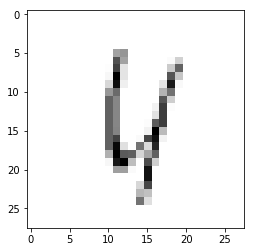

In [49]:
import matplotlib.pyplot as plt
import random

sess = tf.Session(config = config)

r = random.randint(0, mnist.test.num_examples - 1) #임의의 image 꺼내기 
print('Label: ', sess.run(tf.argmax(mnist.test.labels[r:r+1], 1))) #실제 label
print('Prediction: ', sess.run(tf.argmax(mnist.test.labels[r:r+1], 1), 
                              feed_dict = {X: mnist.test.images[r:r+1]})) #예측 label

#실제 이미지 보기 
plt.imshow(mnist.test.images[r:r+1].reshape(28,28), cmap = 'Greys', interpolation = 'nearest')
plt.show()